In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/4th SEM/Datasets/startup-2 - startup-2.csv")

In [ ]:
data.head()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,NaN,NaN,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
data=data.iloc[:,1:]
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,NaN,NaN,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
data.isnull().sum()

R&D Spend          4
Administration     4
Marketing Spend    0
State              3
Profit             3
dtype: int64

In [ ]:
data["R&D Spend"]=data["R&D Spend"].fillna(data["R&D Spend"].mean())
data["Profit"]=data["Profit"].fillna(data["Profit"].mean())
data["Administration"]=data["Administration"].fillna(data["Administration"].mean())

In [ ]:
data=data.drop("State",axis=1)

In [ ]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [ ]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.251992,0.683020,0.921165
Administration,0.251992,1.000000,-0.024989,0.208506
Marketing Spend,0.683020,-0.024989,1.000000,0.748876
Profit,0.921165,0.208506,0.748876,1.000000


<Axes: >

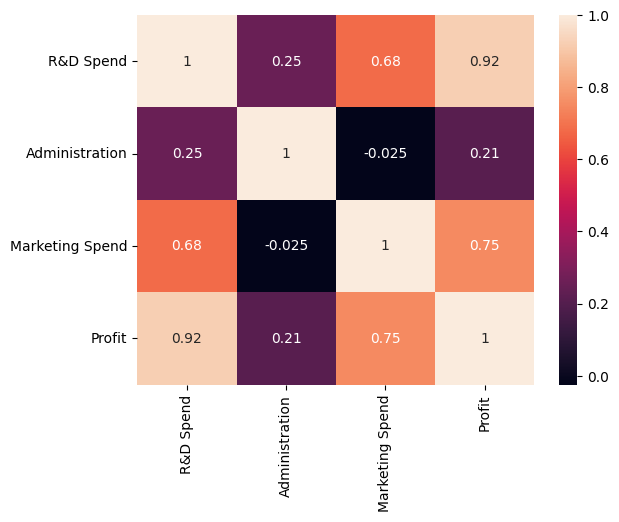

In [ ]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

In [ ]:
x=data.iloc[:,[0,2]]
y=data.iloc[:,3:4]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(x,y,random_state=1,train_size=0.8)

In [ ]:
from sklearn.linear_model import LinearRegression
rg=LinearRegression()
rg.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
rg.coef_, rg.intercept_

(array([[0.73929591, 0.04533749]]), array([49914.34548829]))

In [ ]:
ypred_train=rg.predict(xtrain)

In [ ]:
from sklearn.metrics import r2_score
r2_score(ytrain,ypred_train)

0.9186968441648292

In [ ]:
ypred_test=rg.predict(xtest)
r2_score(ytest,ypred_test)

0.7439752191977165

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0.5, 0.92, 'Multiple Linear Regression\n717822I216-Hari')

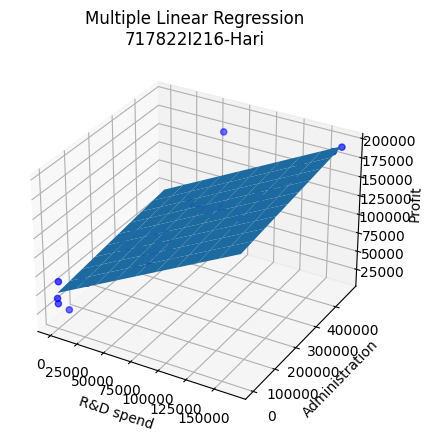

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x1_range = np.linspace(min(x.iloc[:, 0]), max(x.iloc[:, 0]), 10)
x2_range = np.linspace(min(x.iloc[:, 1]), max(x.iloc[:, 1]), 10)
X1_grid, X2_grid = np.meshgrid(x1_range, x2_range)
Y_grid = rg.predict(np.c_[X1_grid.ravel(), X2_grid.ravel()]).reshape(X1_grid.shape)
# Creating the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plotting the original data points
ax.scatter(x.iloc[:, 0], x.iloc[:, 1], y, color='blue', label='Data')
# Plotting the plane of best fit
ax.plot_surface(X1_grid, X2_grid, Y_grid)
# Adding labels and legend
ax.set_xlabel('R&D spend')
ax.set_ylabel('Administration')
ax.set_zlabel('Profit')
ax.set_title('Multiple Linear Regression\n717822I216-Hari')